In [331]:
import pandas as pd
from pandas import json_normalize
import re
import requests 
import json
import os
import numpy as np
import seaborn as sns
from dotenv import load_dotenv #conda install -c conda-forge python-dotenv
import plotly.express as px
import plotly as plt
sns.set_palette("rocket")

import time

In [6]:
key = os.getenv("key")
secret = os.getenv("secret")
load_dotenv()


True

In [7]:
url = f"https://api.nytimes.com/svc/books/v3/lists/full-overview.json?api-key={key}"
books = requests.get(url).json()

In [8]:
booksdf = pd.DataFrame(books)


In [9]:
booksdf

,status,copyright,num_results,results
bestsellers_date,OK,Copyright (c) 2022 The New York Times Company....,230,2022-10-15
lists,OK,Copyright (c) 2022 The New York Times Company....,230,"[{'list_id': 704, 'list_name': 'Combined Print..."
next_published_date,OK,Copyright (c) 2022 The New York Times Company....,230,
previous_published_date,OK,Copyright (c) 2022 The New York Times Company....,230,2022-10-23
published_date,OK,Copyright (c) 2022 The New York Times Company....,230,2022-10-30
published_date_description,OK,Copyright (c) 2022 The New York Times Company....,230,latest


In [10]:
listbooks = booksdf["results"]["lists"]

In [11]:
# llista
dflistbooks = pd.DataFrame(listbooks)
dflistbooks.head()

,list_id,list_name,list_name_encoded,display_name,updated,list_image,list_image_width,list_image_height,books
0,704,Combined Print and E-Book Fiction,combined-print-and-e-book-fiction,Combined Print & E-Book Fiction,WEEKLY,None,None,None,"[{'age_group': '', 'amazon_product_url': 'http..."
1,708,Combined Print and E-Book Nonfiction,combined-print-and-e-book-nonfiction,Combined Print & E-Book Nonfiction,WEEKLY,None,None,None,"[{'age_group': '', 'amazon_product_url': 'http..."
2,1,Hardcover Fiction,hardcover-fiction,Hardcover Fiction,WEEKLY,None,None,None,"[{'age_group': '', 'amazon_product_url': 'http..."
3,2,Hardcover Nonfiction,hardcover-nonfiction,Hardcover Nonfiction,WEEKLY,None,None,None,"[{'age_group': '', 'amazon_product_url': 'http..."
4,17,Trade Fiction Paperback,trade-fiction-paperback,Paperback Trade Fiction,WEEKLY,None,None,None,"[{'age_group': '', 'amazon_product_url': 'http..."


In [12]:
books = dflistbooks["books"]

In [13]:
categories_list = dflistbooks["list_name"].unique()
categories_list

array(['Combined Print and E-Book Fiction',
       'Combined Print and E-Book Nonfiction', 'Hardcover Fiction',
       'Hardcover Nonfiction', 'Trade Fiction Paperback',
       'Paperback Nonfiction', 'Advice How-To and Miscellaneous',
       'Childrens Middle Grade Hardcover', 'Picture Books',
       'Series Books', 'Young Adult Hardcover', 'Audio Fiction',
       'Audio Nonfiction', 'Business Books', 'Graphic Books and Manga',
       'Mass Market Monthly', 'Middle Grade Paperback Monthly',
       'Young Adult Paperback Monthly'], dtype=object)

In [14]:
## prova d'afegir la columna que apareix en lists que determina el tipus d'edició!!!! (hardcover, paperback, etc.)
#list_name!!! -- hi han 17 tipus de categories
dfbooksoutput = pd.DataFrame()


for group in books:
        
    diction = pd.DataFrame(group)
    dfbooksoutput = pd.concat([dfbooksoutput, diction], ignore_index=True)
        
#dfbooksoutput = dfbooksoutput.dropna(thresh=3)
dfbooksoutput

,age_group,amazon_product_url,article_chapter_link,author,book_image,book_image_width,book_image_height,book_review_link,book_uri,contributor,...,primary_isbn10,primary_isbn13,publisher,rank,rank_last_week,sunday_review_link,title,updated_date,weeks_on_list,buy_links
0,,https://www.amazon.com/dp/1538719827?tag=NYTBS...,,David Baldacci,https://storage.googleapis.com/du-prd/books/im...,331,500,,nyt://book/3368422a-b609-552d-9b3a-c50233b2c12a,by David Baldacci,...,1538719797,9781538719794,Grand Central,1,0,,LONG SHADOWS,2022-10-19 22:26:48,1,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
1,,https://www.amazon.com/dp/1501101781?tag=NYTBS...,,Nelson DeMille,https://storage.googleapis.com/du-prd/books/im...,331,500,,nyt://book/93487d56-408a-54d4-951c-3666e9898807,by Nelson DeMille,...,1501101803,9781501101809,Scribner,2,0,,THE MAZE,2022-10-19 22:26:48,1,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
2,,https://www.amazon.com/dp/1791392792?tag=NYTBS...,,Colleen Hoover,https://storage.googleapis.com/du-prd/books/im...,324,500,,nyt://book/013c7729-a1de-5e5c-921a-da43243f9a4a,by Colleen Hoover,...,1538724731,9781538724736,Grand Central,3,2,,VERITY,2022-10-19 22:26:48,45,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
3,,http://www.amazon.com/Ends-Us-Novel-Colleen-Ho...,,Colleen Hoover,https://storage.googleapis.com/du-prd/books/im...,319,495,,nyt://book/e2a3545e-e9cb-5828-9d97-50a798a0e4f6,by Colleen Hoover,...,1501110365,9781501110368,Atria,4,3,,IT ENDS WITH US,2022-10-19 22:26:48,70,"[{'name': 'Amazon', 'url': 'http://www.amazon...."
4,,https://www.amazon.com/dp/1668002175?tag=NYTBS...,,Stephen King,https://storage.googleapis.com/du-prd/books/im...,329,500,,nyt://book/1c203c2d-147d-5639-8e0c-009ba6f15698,by Stephen King,...,1668002175,9781668002179,Scribner,5,5,,FAIRY TALE,2022-10-19 22:26:48,6,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,,https://www.amazon.com/Long-Way-Down-Jason-Rey...,,Jason Reynolds,https://storage.googleapis.com/du-prd/books/im...,328,495,,nyt://book/434525fe-4696-5f1c-a6d3-de2fbd14c542,by Jason Reynolds,...,1481438263,9781481438261,Atheneum/Caitlyn Dlouhy,6,0,,LONG WAY DOWN,2022-10-05 22:58:17,0,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
226,,http://www.amazon.com/Absolutely-True-Diary-Pa...,,Sherman Alexie.,https://storage.googleapis.com/du-prd/books/im...,322,495,,nyt://book/dbe607f5-6f94-5709-b06b-42087923b34f,by Sherman Alexie. Illustrated by Ellen Forney,...,0316013692,9780316013697,"Little, Brown",7,0,https://www.nytimes.com/2007/11/11/books/revie...,THE ABSOLUTELY TRUE DIARY OF A PART-TIME INDIAN,2022-10-05 22:58:17,0,"[{'name': 'Amazon', 'url': 'http://www.amazon...."
227,,https://www.amazon.com/dp/0593403983?tag=NYTBS...,,Ginny Myers Sain,https://storage.googleapis.com/du-prd/books/im...,331,500,,nyt://book/1dc352af-f128-5106-b0bd-5931855295f0,by Ginny Myers Sain,...,0593403983,9780593403983,Razorbill,8,0,,DARK AND SHALLOW LIES,2022-10-05 22:58:17,0,"[{'name': 'Amazon', 'url': 'https://www.amazon..."
228,,http://www.amazon.com/Six-Crows-Leigh-Bardugo/...,,Leigh Bardugo,https://storage.googleapis.com/du-prd/books/im...,330,491,,nyt://book/90141a33-530f-5f44-a4b9-90ef74230800,by Leigh Bardugo,...,125007696X,9781250076960,Square Fish,9,0,,SIX OF CROWS,2022-10-05 22:58:17,0,"[{'name': 'Amazon', 'url': 'http://www.amazon...."


In [15]:

dfbooksoutput.rename(columns={'primary_isbn13': 'isbn'},inplace=True, errors='raise')
df_bestsellernyt = dfbooksoutput.drop_duplicates(subset=['title'], keep='first')

df_bestsellernyt = df_bestsellernyt.drop(columns=["age_group","amazon_product_url","article_chapter_link","book_image_width","book_uri","book_image_height","first_chapter_link","buy_links" ])


df_bestsellernyt


,author,book_image,book_review_link,contributor,contributor_note,created_date,description,price,primary_isbn10,isbn,publisher,rank,rank_last_week,sunday_review_link,title,updated_date,weeks_on_list
0,David Baldacci,https://storage.googleapis.com/du-prd/books/im...,,by David Baldacci,,2022-10-19 22:22:26,The seventh book in the Memory Man series. Dec...,0.00,1538719797,9781538719794,Grand Central,1,0,,LONG SHADOWS,2022-10-19 22:26:48,1
1,Nelson DeMille,https://storage.googleapis.com/du-prd/books/im...,,by Nelson DeMille,,2022-10-19 22:22:27,The eighth book in the John Corey series. When...,0.00,1501101803,9781501101809,Scribner,2,0,,THE MAZE,2022-10-19 22:26:48,1
2,Colleen Hoover,https://storage.googleapis.com/du-prd/books/im...,,by Colleen Hoover,,2022-10-19 22:22:27,Lowen Ashleigh is hired by the husband of an i...,0.00,1538724731,9781538724736,Grand Central,3,2,,VERITY,2022-10-19 22:26:48,45
3,Colleen Hoover,https://storage.googleapis.com/du-prd/books/im...,,by Colleen Hoover,,2022-10-19 22:22:27,A battered wife raised in a violent home attem...,0.00,1501110365,9781501110368,Atria,4,3,,IT ENDS WITH US,2022-10-19 22:26:48,70
4,Stephen King,https://storage.googleapis.com/du-prd/books/im...,,by Stephen King,,2022-10-19 22:22:27,A high school kid inherits a shed that is a po...,0.00,1668002175,9781668002179,Scribner,5,5,,FAIRY TALE,2022-10-19 22:26:48,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Jason Reynolds,https://storage.googleapis.com/du-prd/books/im...,,by Jason Reynolds,,2022-10-05 22:58:17,,0.00,1481438263,9781481438261,Atheneum/Caitlyn Dlouhy,6,0,,LONG WAY DOWN,2022-10-05 22:58:17,0
226,Sherman Alexie.,https://storage.googleapis.com/du-prd/books/im...,,by Sherman Alexie. Illustrated by Ellen Forney,Illustrated by Ellen Forney,2022-10-05 22:58:17,,0.00,0316013692,9780316013697,"Little, Brown",7,0,https://www.nytimes.com/2007/11/11/books/revie...,THE ABSOLUTELY TRUE DIARY OF A PART-TIME INDIAN,2022-10-05 22:58:17,0
227,Ginny Myers Sain,https://storage.googleapis.com/du-prd/books/im...,,by Ginny Myers Sain,,2022-10-05 22:58:17,,0.00,0593403983,9780593403983,Razorbill,8,0,,DARK AND SHALLOW LIES,2022-10-05 22:58:17,0
228,Leigh Bardugo,https://storage.googleapis.com/du-prd/books/im...,,by Leigh Bardugo,,2022-10-05 22:58:17,,0.00,125007696X,9781250076960,Square Fish,9,0,,SIX OF CROWS,2022-10-05 22:58:17,0


In [16]:
df_bestsellernyt["title"].value_counts()

LONG SHADOWS                                1
THE LEAF THIEF                              1
THE INK BLACK HEART                         1
WRONG PLACE WRONG TIME                      1
GREENLIGHTS                                 1
                                           ..
LIGHTER                                     1
THE BOOK OF BOUNDARIES                      1
REST IS RESISTANCE                          1
THE BOY, THE MOLE, THE FOX AND THE HORSE    1
DANCE OF THIEVES                            1
Name: title, Length: 177, dtype: int64

In [264]:
df_raw2 = pd.read_csv ('./data/books_1.Best_Books_Ever.csv', encoding='unicode_escape')
df_raw2

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPrÃ© (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,Englis

In [265]:
# I remove the unknown ISBN! ->turn into function
df_raw2.columns
print(len(df_raw2))
df_raw2 = df_raw2[df_raw2["isbn"]!= '9999999999999']
print(len(df_raw2))

52478
48124


In [266]:
print(len(df_raw2["isbn"].unique()))
# I will remove duplicated ISBNs!!
df_raw2 = df_raw2.drop_duplicates(subset=["isbn"], keep=False)
print(len(df_raw2["isbn"].unique()))

48071
48018


In [199]:
'''def clean_isbn(column):
    column = column.str.extract("(\d{1,2})")
    return column
df_raw2["isbn"].sample()'''

'def clean_isbn(column):\n    column = column.str.extract("(\\d{1,2})")\n    return column\ndf_raw2["isbn"].sample()'

In [267]:
# I clean author -> turn into function
def clean_author(column):
    auth=[]
    for names in column:
        names = names.split(",")
        newname = names[0].split("(")
        auth.append(newname[0])
    return auth

df_raw2["author"] = clean_author(df_raw2["author"])

In [269]:
# I clean genre, I will just keep the first genre for each title...
new_genre = []
for row in df_raw2["genres"]:
    row = row [1:-1]
    row=row.split(", ")
    #row=row.split(",")
    new_row = []
    for i in row:
        c= i[1:-1]
        new_row.append(c)
    new_genre.append(new_row[0])
df_raw2["genres"]=new_genre



In [270]:
df_raw2.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [271]:
df_raw2 = df_raw2.drop(columns = ["description","characters","ratingsByStars","setting"])

In [272]:
## top 10 more valued authors! (considering rating * numRatings)

df_author =  df_raw2[["author", "rating", "numRatings"]]

## turn into a function


df_author_grouped = df_author.groupby("author").mean()

df_author_grouped = df_author_grouped.drop(df_author_grouped[df_author_grouped.rating == 0].index)

df_author_grouped["all_rate"] = df_author_grouped["rating"]*df_author_grouped["numRatings"]

df_author_grouped.sort_values("all_rate", ascending=False, inplace=True)
df_author_grouped.head(10)

,rating,numRatings,all_rate
author,,,
Arthur Golden,4.120000,1.717312e+06,7.075325e+06
Emily BrontÃ«,3.860000,1.342664e+06,5.182683e+06
Paula Hawkins,3.755000,1.196602e+06,4.493241e+06
Delia Owens,4.470000,9.752840e+05,4.359519e+06
Suzanne Collins,4.231667,9.868737e+05,4.176120e+06
Bram Stoker,4.000000,9.383250e+05,3.753300e+06
Tara Westover,4.470000,7.960190e+05,3.558205e+06
Stephenie Meyer,3.830909,8.343485e+05,3.196313e+06
J.D. Salinger,4.020000,7.756072e+05,3.117941e+06


In [273]:
## top 10 more valued titles! (considering rating * numRatings)
df_titles =  df_raw2[["title","author","rating", "numRatings"]]



df_titles["all_rate"]= df_titles["rating"]*df_titles["numRatings"]
df_titles.sort_values("all_rate", ascending=False, inplace=True)
df_titles.head(10)



/var/folders/7s/v9wty4qj3t1cw493y3p29dbc0000gn/T/ipykernel_1469/3068915836.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7s/v9wty4qj3t1cw493y3p29dbc0000gn/T/ipykernel_1469/3068915836.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,author,rating,numRatings,all_rate
0,The Hunger Games,Suzanne Collins,4.33,6376780,27611457.40
4,Twilight,Stephenie Meyer,3.60,4964519,17872268.40
80,1984,George Orwell,4.19,3140442,13158451.98
71,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62,2811637,12989762.94
93,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.57,2806471,12825572.47
147,"The Hobbit, or There and Back Again",J.R.R. Tolkien,4.27,2896265,12367051.55
21,Divergent,Veronica Roth,4.19,2906258,12177221.02
126,Harry Potter and the Chamber of Secrets,J.K. Rowling,4.43,2725847,12075502.21
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,2507623,11284303.50
6,Animal Farm,George Orwell,3.95,2740713,10825816.35


In [274]:
df_titles2 = df_titles[["title","author"]]
df_titles2.head(10)

,title,author
0,The Hunger Games,Suzanne Collins
4,Twilight,Stephenie Meyer
80,1984,George Orwell
71,Harry Potter and the Deathly Hallows,J.K. Rowling
93,Harry Potter and the Prisoner of Azkaban,J.K. Rowling
147,"The Hobbit, or There and Back Again",J.R.R. Tolkien
21,Divergent,Veronica Roth
126,Harry Potter and the Chamber of Secrets,J.K. Rowling
1,Harry Potter and the Order of the Phoenix,J.K. Rowling
6,Animal Farm,George Orwell


In [275]:
#which publishing house has the best value (ratings)
df_publisher =  df_raw2[["publisher","rating", "numRatings"]]

df_publisher = df_publisher.groupby("publisher").mean()

df_publisher["all_rate"]= df_publisher["rating"]*df_publisher["numRatings"]
df_publisher.sort_values("all_rate", ascending=False, inplace=True)
df_publisher.head(5)

,rating,numRatings,all_rate
publisher,,,
Arthur A. Levine Books / Scholastic Inc.,4.525,2768742.0,1.252856e+07
Zola Books,3.970,1573857.0,6.248212e+06
HarperPerennial / Perennial Classics,3.990,1441287.0,5.750735e+06
New English Library (Hodder & Stoughton),4.230,1126760.0,4.766195e+06
Disney Hyperion Books,4.065,997324.5,4.054124e+06


<AxesSubplot:xlabel='numRatings', ylabel='rating'>

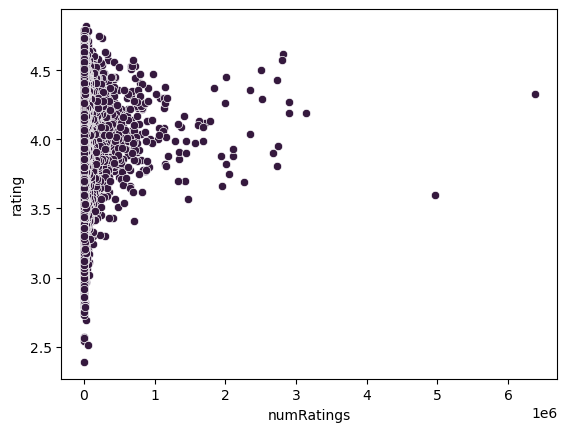

In [276]:
#is there a relation between the number of reviews and the rating -> do books with the higher number of ratings get a better review?
df_ratings = df_raw2[df_raw2["numRatings"]>1000]
sns.scatterplot(data=df_ratings, x=df_ratings["numRatings"], y=df_ratings["rating"])



[Text(0.5, 1.0, 'Correlation between Rating and Number of Reviews')]

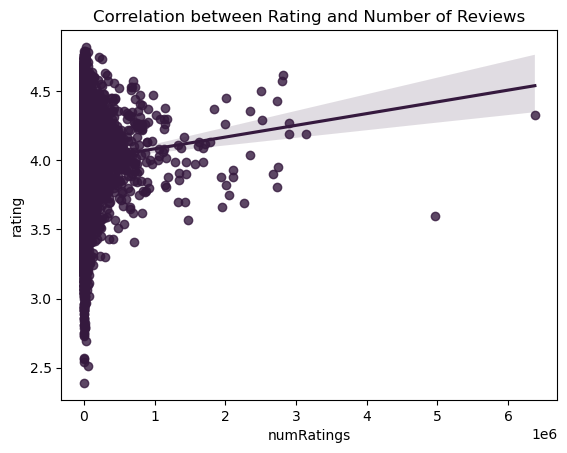

In [277]:
sns.regplot(data=df_ratings,  x=df_ratings["numRatings"], y=df_ratings["rating"],scatter=True).set(title='Correlation between Rating and Number of Reviews')

### WE CAN SAY THE MORE REVIEWS A BOOK HAS, THE MORE LIKELY THE RATING GETS GOOD VALORATION

In [279]:
# in the actual bestseller list, which publishing house has more tittles??
df_publishinbestseller = df_bestsellernyt[["publisher","title"]]
df_publishinbestseller = df_publishinbestseller.groupby("publisher").count()
df_publishinbestseller.sort_values("title", ascending=False, inplace=True)

df_publishinbestseller.head(5)


,title
publisher,
Scholastic,14
Atria,8
"Little, Brown",8
Simon & Schuster,7
Grand Central,6


In [280]:
# from our list of bestsellers, which is the publishing house that has more titles, whats the avg price of the books?

df_countpublish = df_raw2["publisher"].value_counts()
df_countpublish = pd.DataFrame(df_countpublish)
df_countpublish.head(5)
#
#sns.histplot(df_countpublish.head(5))

,publisher
HarperCollins,552
Vintage,542
Penguin Books,413
Ballantine Books,392
Bantam,366


In [281]:
#amb df_raw2i df_bestsellernyt vull comprovar que tots els títols d'aquest setmana, estan al meu df

#inner join - merge
lista= []
for ide in df_bestsellernyt["isbn"]:
    if ide in df_raw2["isbn"]:
        lista.append(ide)
len(lista)
        
#sembla ser que la llista actual i la meva no tenen res en comú...
#NO PUC COMPARAR-HO

0

In [282]:
#titles with highest appereance in nyt
df_bestsellernyt.sort_values("weeks_on_list", ascending=False, inplace=True)
df_titlesweeksnyt = df_bestsellernyt[["title","author","weeks_on_list","isbn"]]
df_titlesweeksnyt.head(10)


,title,author,weeks_on_list,isbn
121,DIARY OF A WIMPY KID,and Jeff Kinney,709,9781419749155
120,HARRY POTTER,J.K. Rowling,708,9780545791434
127,PERCY JACKSON & THE OLYMPIANS,Rick Riordan,644,9781484707234
103,WONDER,R.J. Palacio,366,9780375869020
82,"THINKING, FAST AND SLOW",Daniel Kahneman,337,9780374533557
81,JUST MERCY,Bryan Stevenson,297,9780812984965
135,ONE OF US IS LYING,Karen M. McManus,246,9781524714680
105,REFUGEE,Alan Gratz,196,9780545880831
128,WINGS OF FIRE,Tui T. Sutherland,185,9780545349239
5,WHERE THE CRAWDADS SING,Delia Owens,182,9780735219106


In [283]:
'''
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)'''

'\nsns.set_theme(style="ticks", palette="pastel")\n\n# Load the example tips dataset\ntips = sns.load_dataset("tips")\n\n# Draw a nested boxplot to show bills by day and time\nsns.boxplot(x="day", y="total_bill",\n            hue="smoker", palette=["m", "g"],\n            data=tips)\nsns.despine(offset=10, trim=True)'

In [284]:
df_raw2["genres"][0]


'Young Adult'

In [285]:
type(df_raw2["genres"][0])

str

In [286]:
posiblegenres = []
for genre in df_raw2["genres"]:
    if genre not in posiblegenres:
        posiblegenres.append(genre)
len(posiblegenres)           

390

In [287]:
df_raw2['genres'].value_counts()

Fiction           5849
Fantasy           5182
                  3883
Young Adult       2992
Romance           2776
                  ... 
Magick               1
Mental Illness       1
Ecology              1
Evolution            1
Sex Work             1
Name: genres, Length: 390, dtype: int64

In [342]:
df_genre = df_raw2[df_raw2.groupby("genres").genres.transform("count")>1000].copy()
df_genre2 = df_genre[df_genre["genres"]!=""].copy()

In [343]:
df_genre2

,bookId,title,series,author,rating,language,isbn,genres,bookFormat,edition,...,publisher,publishDate,firstPublishDate,awards,numRatings,likedPercent,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,9780439023481,Young Adult,Hardcover,First Edition,...,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,English,9780439358071,Fantasy,Paperback,US Edition,...,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,English,9780316015844,Young Adult,Paperback,NaN,...,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak,4.37,English,9780375831003,Historical Fiction,Hardcover,First American Edition,...,Alfred A. Knopf,03/14/06,09/01/05,['National Jewish Book Award for Childrenâs ...,1834276,96.0,https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,George Orwell,3.95,English,9780451526342,Classics,Mass Market Paperback,NaN,...,Signet Classics,04/28/96,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,91.0,https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52467,40510415-undetected,Undetected,Treasure Hunter Security #8,Anna Hackett,4.56,English,B07DN75RP3,Romance,Kindle Edition,NaN,...,NaN,September 4th 2018,NaN,[],651,100.0,https://i.gr-assets.com/images/S/compressed.ph...,1,1,NaN
52471,12464361-elemental,Elemental,Soul Guardians #2,Kim Richardson,4.07,English,B005IGOSCC,Fantasy,Kindle Edition,NaN,...,Kim Richardson,August 21st 2011,August 1st 2011,[],1947,94.0,https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52472,12395883-unbelievable,Unbelievable,Port Fare #2,Sherry Gammon,4.16,English,9781477594247,Romance,Paperback,NaN,...,Wordpaintings Unlimited,April 11th 2013,March 30th 2013,[],1028,94.0,https://i.gr-assets.com/images/S/compressed.ph...,0,1,19.18
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson,3.70,English,9781461017097,Fantasy,Paperback,NaN,...,CreateSpace,March 18th 2011,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,84.0,https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37


In [344]:
#sns.displot(df_genre, y= df_genre['genres']).set(title='Number of titles for each genre')

fig = px.bar(df_genre2, x=df_genre2.genres.value_counts().values, y = df_genre2.genres.value_counts().index, labels={"x": "Nº of titles","y": "Genre"},title="Nº of books per genre")
fig.update_yaxes(categoryorder = "total ascending")

In [345]:
df_genre3 = df_genre2[["genres","rating"]]

df_genre3 = df_genre3.groupby("genres").mean()
df_genre3.sort_values("rating", ascending=False, inplace=True)
df_genre3

,rating
genres,
Fantasy,4.034298
Nonfiction,4.023828
Historical Fiction,4.015426
Romance,4.009204
Science Fiction,3.972424
Mystery,3.960171
Classics,3.933346
Young Adult,3.871818
Fiction,3.863787


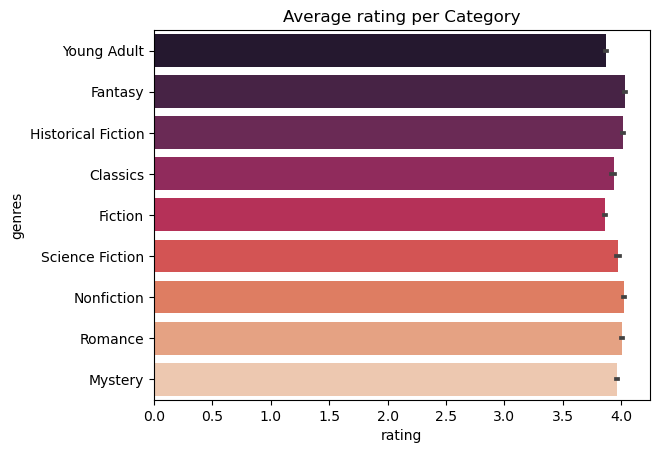

In [346]:
graph = sns.barplot(data=df_genre2, y="genres", x="rating", palette="rocket").set(title = "Average rating per Category")


    

In [353]:
df_bookformat = df_raw2[df_raw2.groupby("bookFormat").bookFormat.transform("count")>500].copy()
df_bookformat["bookFormat"].unique()


array(['Hardcover', 'Paperback', 'Mass Market Paperback',
       'Kindle Edition', 'ebook'], dtype=object)

In [355]:
#which bookformat is more sold?

fig = px.bar(df_raw2, x=df_bookformat.bookFormat.value_counts().values, y = df_bookformat.bookFormat.value_counts().index, labels={"x": "Nº of titles","y": "Book Format"},title="Nº of books per genre")
fig.update_yaxes(categoryorder = "total ascending")




In [358]:
# do people preffer to read in hardbook? - no em diu res això!
df_bookformat2 = df_bookformat[["bookFormat","rating"]]

df_bookformat2 = df_bookformat2.groupby("bookFormat").mean()
df_bookformat2.sort_values("rating", ascending=False, inplace=True)
df_bookformat2

,rating
bookFormat,
Kindle Edition,4.121704
ebook,4.073289
Paperback,4.005783
Mass Market Paperback,3.996430
Hardcover,3.990391


In [365]:
df_bestsellernyt


,author,book_image,book_review_link,contributor,contributor_note,created_date,description,price,primary_isbn10,isbn,publisher,rank,rank_last_week,sunday_review_link,title,updated_date,weeks_on_list
121,and Jeff Kinney,https://storage.googleapis.com/du-prd/books/im...,,written and illustrated by Jeff Kinney,written and illustrated by Jeff Kinney,2022-10-19 22:22:21,The travails and challenges of adolescence.,0.00,1419749153,9781419749155,Amulet,2,1,,DIARY OF A WIMPY KID,2022-10-19 22:26:43,709
120,J.K. Rowling,https://storage.googleapis.com/du-prd/books/im...,,by J.K. Rowling,,2022-10-19 22:22:21,A wizard hones his conjuring skills in the ser...,0.00,054579143X,9780545791434,Scholastic,1,2,,HARRY POTTER,2022-10-19 22:26:43,708
127,Rick Riordan,https://storage.googleapis.com/du-prd/books/im...,,by Rick Riordan,,2022-10-19 22:22:22,A boy battles mythological monsters.,0.00,1484707230,9781484707234,Disney-Hyperion,8,8,https://www.nytimes.com/2009/05/31/books/revie...,PERCY JACKSON & THE OLYMPIANS,2022-10-19 22:26:43,644
103,R.J. Palacio,https://storage.googleapis.com/du-prd/books/im...,,by R.J. Palacio,,2022-10-19 22:22:22,A boy with a facial deformity starts school.,0.00,0375869026,9780375869020,Knopf,4,4,https://www.nytimes.com/2012/04/08/books/revie...,WONDER,2022-10-19 22:26:44,366
82,Daniel Kahneman,https://storage.googleapis.com/du-prd/books/im...,https://www.nytimes.com/2011/11/27/books/revie...,by Daniel Kahneman,,2022-10-19 22:22:26,When we can and cannot trust our intuitions in...,0.00,0374533555,9780374533557,"Farrar, Straus & Giroux",8,10,https://www.nytimes.com/2011/11/27/books/revie...,"THINKING, FAST AND SLOW",2022-10-19 22:26:47,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Lynda Mullaly Hunt,https://storage.googleapis.com/du-prd/books/im...,,by Lynda Mullaly Hunt,,2022-10-05 22:58:10,,0.00,0142426423,9780142426425,Nancy Paulsen,8,0,,FISH IN A TREE,2022-10-05 22:58:10,0
216,Rosanne Parry.,https://storage.googleapis.com/du-prd/books/im...,,by Rosanne Parry. Illustrated by Mónica Armiño,Illustrated by Mónica Armiño,2022-10-05 22:58:10,,0.00,006289594X,9780062895943,Greenwillow,7,0,,A WOLF CALLED WANDER,2022-10-05 22:58:10,0
223,Kathleen Glasgow,https://storage.googleapis.com/du-prd/books/im...,,by Kathleen Glasgow,,2022-10-05 22:58:17,,0.00,1101934743,9781101934746,Ember,4,0,,GIRL IN PIECES,2022-10-05 22:58:17,0
215,Barbara O'Connor,https://storage.googleapis.com/du-prd/books/im...,,by Barbara O'Connor,,2022-10-05 22:58:10,,0.00,1250144051,9781250144058,Square Fish,6,0,,WISH,2022-10-05 22:58:10,0
